<a href="https://colab.research.google.com/github/Anna-bashkatova/ProgramAnalitik/blob/main/%D0%9B%D0%B0%D0%B1_6_%D0%91%D0%B0%D1%88%D0%BA%D0%B0%D1%82%D0%BE%D0%B2%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Примеры лабораторной работы

In [ ]:
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std

seed(1)
data = 5*randn(100)+50
print('mean=%.3f stdv=%.3f' % (mean(data), std(data)))

mean=50.303 stdv=4.426


**График гисторгаммы**

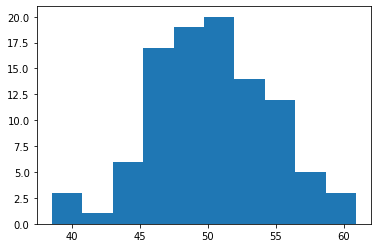

In [ ]:
from numpy.random import seed
from numpy.random import randn
from matplotlib import pyplot

seed(1)
data = 5*randn(100)+50
pyplot.hist(data)
pyplot.show()

**График Q-Q**

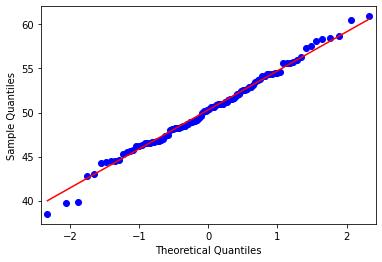

In [2]:
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
import pandas.util.testing as tm
from matplotlib import pyplot

seed(1)
data = 5*randn(100)+50
qqplot(data, line='s')
pyplot.show()

**Тест Шапиро-Вилка**

In [ ]:
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro

seed(1)
data=5*randn(100)+50
stat,p=shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat,p))

alpha=0.05
if p > alpha:
  print('Sample looks Gaussian (fail to reject H0)')
else:
  print('Sample does not looks Gaussian (reject H0)')

Statistics=0.992, p=0.822
Sample looks Gaussian (fail to reject H0)


**Тест д'Агостино на K^2**

In [ ]:
from numpy.random import seed
from numpy.random import randn
from scipy.stats import normaltest

seed(1)

data=5*randn(100)+50

stat,p=normaltest(data)
print('Statistics=%.3f, p=%.3f' % (stat,p))

alpha=0.05
if p > alpha:
  print('Sample looks Gaussian (fail to reject H0)')
else:
  print('Sample does not looks Gaussian (reject H0)')

Statistics=0.102, p=0.950
Sample looks Gaussian (fail to reject H0)


**Тест Андерсона-Дарлинга**

In [ ]:
from numpy.random import seed
from numpy.random import randn
from scipy.stats import anderson

seed(1)

data=5*randn(100)+50

result=anderson(data)
print('Statistics=%.3f, p=%.3f' % (stat,p))
p=0
for i in range(len(result.critical_values)):
  sl,cv = result.significance_level[i], result.critical_values[i]
  if result.statistic < result.critical_values[i]:
    print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl,cv))
  else:
    print('%.3f: %.3f, data does not looks normal (reject H0)' % (sl,cv))

Statistics=0.102, p=0.000
15.000: 0.555, data looks normal (fail to reject H0)
10.000: 0.632, data looks normal (fail to reject H0)
5.000: 0.759, data looks normal (fail to reject H0)
2.500: 0.885, data looks normal (fail to reject H0)
1.000: 1.053, data looks normal (fail to reject H0)


# Загрузка данных 
Вариант 11. Таблица о самых кассовых фильмах Румынии

In [ ]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

url='https://en.wikipedia.org/wiki/List_of_highest-grossing_films_in_Romania'
req = requests.get(url)
data = pd.read_html(req.text)
df = data[0]

In [ ]:
df.head()

,Rank,Title,Romanian Leu,U.S. dollar,Year,Ref
0,1,Avatar,18537471,"$6,317,366",2009,[# 1]
1,2,Aquaman,15722391,"$3,848,753",2018,[# 2]
2,3,Avengers: Endgame,14401724,"$3,379,432",2019,[# 3]
3,4,Star Wars: The Force Awakens,13515925,"$3,256,966",2015,[# 4]
4,5,Frozen II,13453922,"$3,119,154",2019,[# 5]


In [ ]:
df['U.S. dollar'] = df['U.S. dollar'].str.replace(r"$","").str.replace(r",","")
df['U.S. dollar'] = df['U.S. dollar'].astype('int64')
df.drop(['Rank','Ref'], axis = 1, inplace=True)

In [ ]:
df.head()

,Title,Romanian Leu,U.S. dollar,Year
0,Avatar,18537471,6317366,2009
1,Aquaman,15722391,3848753,2018
2,Avengers: Endgame,14401724,3379432,2019
3,Star Wars: The Force Awakens,13515925,3256966,2015
4,Frozen II,13453922,3119154,2019


# Визуальная проверка нормальности

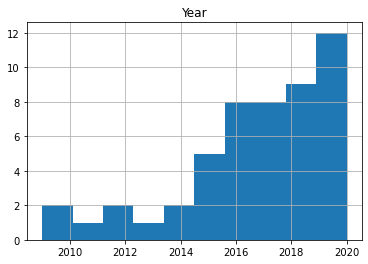

In [ ]:
from pandas import read_csv
from matplotlib import pyplot

df['Year'].hist()
pyplot.title('Year')
pyplot.show()

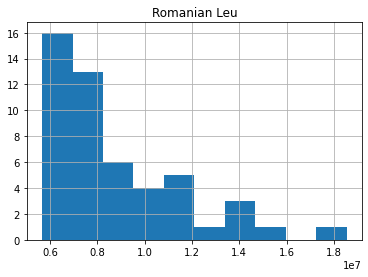

In [ ]:
from pandas import read_csv
from matplotlib import pyplot

df['Romanian Leu'].hist()
pyplot.title('Romanian Leu')
pyplot.show()

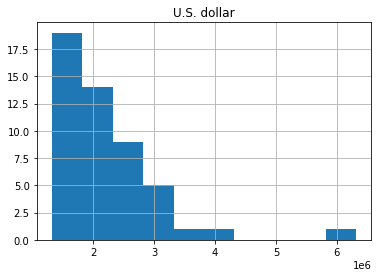

In [ ]:
from pandas import read_csv
from matplotlib import pyplot

df['U.S. dollar'].hist()
pyplot.title('U.S. dollar')
pyplot.show()

# QQ график

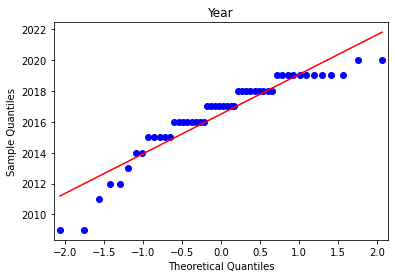

In [ ]:
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

qqplot(df['Year'], line='s')
pyplot.title('Year')
pyplot.show();

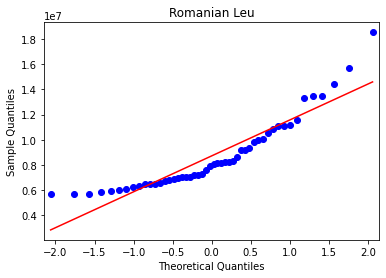

In [ ]:
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

qqplot(df['Romanian Leu'], line='s')
pyplot.title('Romanian Leu')
pyplot.show();

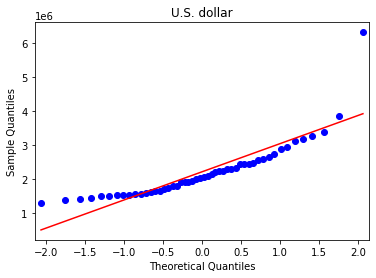

In [ ]:
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

qqplot(df['U.S. dollar'], line='s')
pyplot.title('U.S. dollar')
pyplot.show();

# Тест Шапиро-Вилка



In [ ]:
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro

print('Year')

stat,p=shapiro(df['Year'])
print('Statistics=%.3f, p=%.3f' % (stat,p))

alpha=0.05
if p > alpha:
  print('Sample looks Gaussian (fail to reject H0)')
else:
  print('Sample does not looks Gaussian (reject H0)')

Year
Statistics=0.885, p=0.000
Sample does not looks Gaussian (reject H0)


In [ ]:
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro

print('Romanian Leu')

stat,p=shapiro(df['Romanian Leu'])
print('Statistics=%.3f, p=%.3f' % (stat,p))

alpha=0.05
if p > alpha:
  print('Sample looks Gaussian (fail to reject H0)')
else:
  print('Sample does not looks Gaussian (reject H0)')

Romanian Leu
Statistics=0.862, p=0.000
Sample does not looks Gaussian (reject H0)


In [ ]:
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro

print('U.S. dollar')

stat,p=shapiro(df['U.S. dollar'])
print('Statistics=%.3f, p=%.3f' % (stat,p))

alpha=0.05
if p > alpha:
  print('Sample looks Gaussian (fail to reject H0)')
else:
  print('Sample does not looks Gaussian (reject H0)')

U.S. dollar
Statistics=0.776, p=0.000
Sample does not looks Gaussian (reject H0)


# К'2-тест Д'Агостино

In [ ]:
from numpy.random import seed
from numpy.random import randn
from scipy.stats import normaltest

print('Year')

stat,p=normaltest(df['Year'])
print('Statistics=%.3f, p=%.3f' % (stat,p))

alpha=0.05
if p > alpha:
  print('Sample looks Gaussian (fail to reject H0)')
else:
  print('Sample does not looks Gaussian (reject H0)')

Year
Statistics=13.695, p=0.001
Sample does not looks Gaussian (reject H0)


In [ ]:
from numpy.random import seed
from numpy.random import randn
from scipy.stats import normaltest

print('Romanian Leu')

stat,p=normaltest(df['Romanian Leu'])
print('Statistics=%.3f, p=%.3f' % (stat,p))

alpha=0.05
if p > alpha:
  print('Sample looks Gaussian (fail to reject H0)')
else:
  print('Sample does not looks Gaussian (reject H0)')


Romanian Leu
Statistics=17.486, p=0.000
Sample does not looks Gaussian (reject H0)


In [ ]:
from numpy.random import seed
from numpy.random import randn
from scipy.stats import normaltest

print('U.S. dollar')

stat,p=normaltest(df['U.S. dollar'])
print('Statistics=%.3f, p=%.3f' % (stat,p))

alpha=0.05
if p > alpha:
  print('Sample looks Gaussian (fail to reject H0)')
else:
  print('Sample does not looks Gaussian (reject H0)')


U.S. dollar
Statistics=49.906, p=0.000
Sample does not looks Gaussian (reject H0)


# Тест Андерсона-Дарлинга

In [ ]:
from numpy.random import seed
from numpy.random import randn
from scipy.stats import anderson

print('Year')

result=anderson(df['Year'])
print('Statistics=%.3f, p=%.3f' % (stat,p))
p=0
for i in range(len(result.critical_values)):
  sl,cv = result.significance_level[i], result.critical_values[i]
  if result.statistic < result.critical_values[i]:
    print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl,cv))
  else:
    print('%.3f: %.3f, data does not looks normal (reject H0)' % (sl,cv))

Year
Statistics=49.906, p=0.000
15.000: 0.538, data does not looks normal (reject H0)
10.000: 0.613, data does not looks normal (reject H0)
5.000: 0.736, data does not looks normal (reject H0)
2.500: 0.858, data does not looks normal (reject H0)
1.000: 1.021, data does not looks normal (reject H0)


In [ ]:
from numpy.random import seed
from numpy.random import randn
from scipy.stats import anderson

print('Romanian Leu')

result=anderson(df['Romanian Leu'])
print('Statistics=%.3f, p=%.3f' % (stat,p))
p=0
for i in range(len(result.critical_values)):
  sl,cv = result.significance_level[i], result.critical_values[i]
  if result.statistic < result.critical_values[i]:
    print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl,cv))
  else:
    print('%.3f: %.3f, data does not looks normal (reject H0)' % (sl,cv))

Romanian Leu
Statistics=49.906, p=0.000
15.000: 0.538, data does not looks normal (reject H0)
10.000: 0.613, data does not looks normal (reject H0)
5.000: 0.736, data does not looks normal (reject H0)
2.500: 0.858, data does not looks normal (reject H0)
1.000: 1.021, data does not looks normal (reject H0)


In [ ]:
from numpy.random import seed
from numpy.random import randn
from scipy.stats import anderson

print('U.S. dollar')

result=anderson(df['U.S. dollar'])
print('Statistics=%.3f, p=%.3f' % (stat,p))
p=0
for i in range(len(result.critical_values)):
  sl,cv = result.significance_level[i], result.critical_values[i]
  if result.statistic < result.critical_values[i]:
    print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl,cv))
  else:
    print('%.3f: %.3f, data does not looks normal (reject H0)' % (sl,cv))

U.S. dollar
Statistics=49.906, p=0.000
15.000: 0.538, data does not looks normal (reject H0)
10.000: 0.613, data does not looks normal (reject H0)
5.000: 0.736, data does not looks normal (reject H0)
2.500: 0.858, data does not looks normal (reject H0)
1.000: 1.021, data does not looks normal (reject H0)


# Таблица

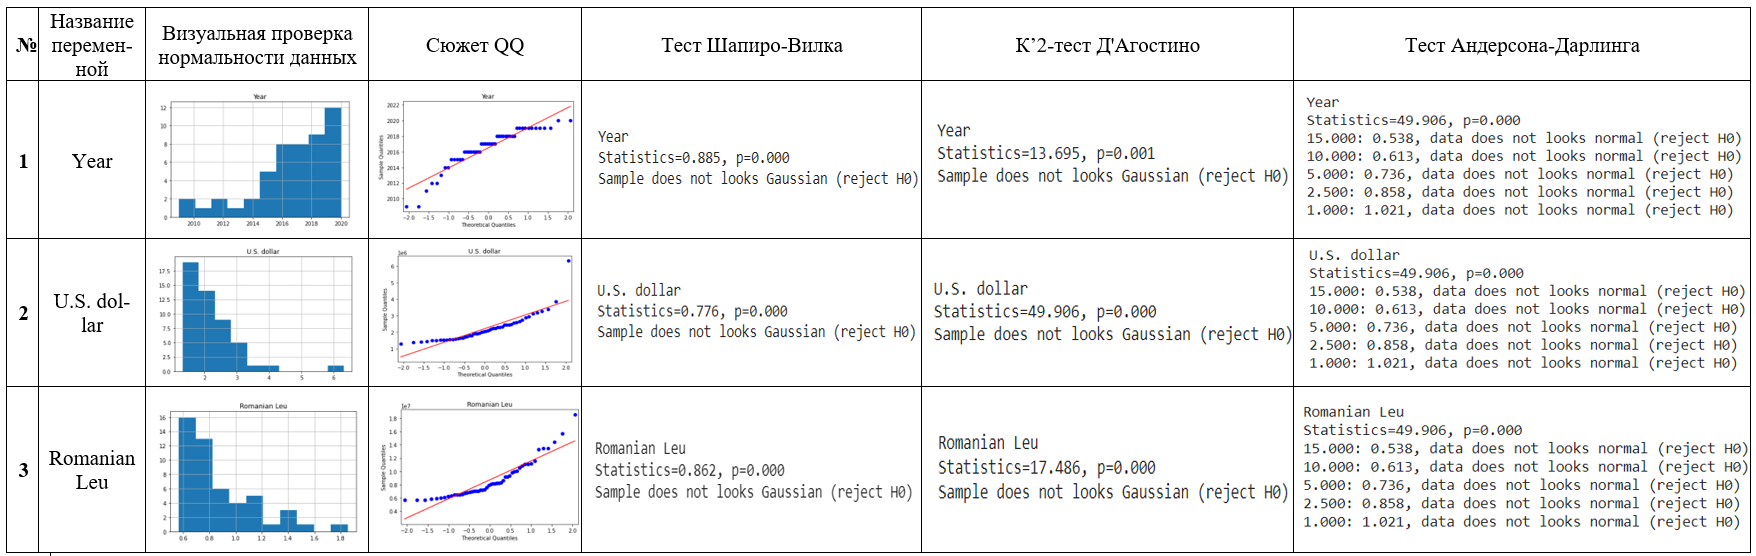